## HW1 
## Yichun Hu

### Problem 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
data1 = pd.read_excel("HW1_Due20200927.xlsx", sheet_name = "DataSource", header = 1)
data1_vix = data1.iloc[:,0:2]

In [7]:
data1_vix['return'] = data1_vix['Price'].pct_change()
data1_vix.head()

,Date,Price,return
0,1999-01-15,29.24,NaN
1,1999-01-19,29.24,0.000000
2,1999-01-20,28.60,-0.021888
3,1999-01-21,30.92,0.081119
4,1999-01-22,31.95,0.033312


#### skewness

In [8]:
data1_vix['return'].dropna().skew()

2.0147831512243357

#### kurtosis

In [9]:
data1_vix['return'].dropna().kurtosis()

19.302523257228803

#### mean

In [10]:
data1_vix['return'].dropna().mean()

0.002357136485960589

#### normality test

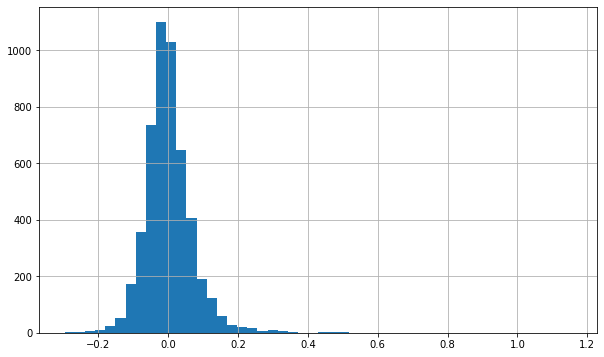

In [11]:
data1_vix['return'].hist(bins = 50, figsize = (10,6), grid = True)

In [12]:
# KS test
stats.kstest(data1_vix['return'].dropna(),'norm')

KstestResult(statistic=0.43284430209658664, pvalue=0.0)

#### From the histogram above, we can observe that the distribution of VIX return is right skewed with a long tail at the right side.
#### And from the KS test that has 0.0 as pvalue, we can reject the hypothesis that the sample is normally distributed.So that we can make the conclusion that the VIX daily return were not normally distributed

### Problem 2

In [13]:
data1_spy = data1.iloc[:,3:]

In [14]:
data1_spy.columns = ['Date','Price'] 
data1_spy.head()

,Date,Price
0,1999-01-15,124.3750
1,1999-01-19,125.1875
2,1999-01-20,126.1875
3,1999-01-21,122.8438
4,1999-01-22,122.5625


In [15]:
data1_spy['return'] = data1_spy['Price'].pct_change()
data1_spy.head()

,Date,Price,return
0,1999-01-15,124.3750,NaN
1,1999-01-19,125.1875,0.006533
2,1999-01-20,126.1875,0.007988
3,1999-01-21,122.8438,-0.026498
4,1999-01-22,122.5625,-0.002290


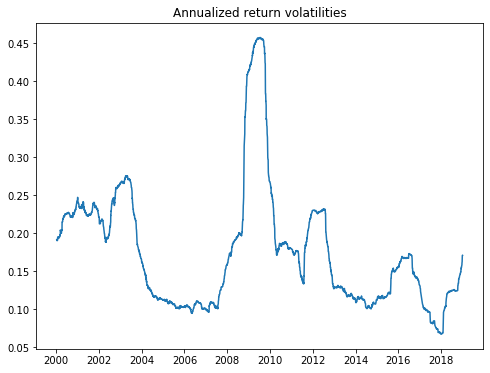

In [17]:
data1_spy['ann_return_vol'] = data1_spy['return'].dropna().rolling(252).std()*np.sqrt(252)
plt.figure(figsize = (8,6))
plt.plot(data1_spy['Date'], data1_spy['ann_return_vol'])
plt.title("Annualized return volatilities");

In [18]:
def semistd(data):
    newdata = []
    for i in data:
        if i < 0:
            newdata.append(i)
    return np.std(newdata)
    #return newdata['return'].std()*np.sqrt(len(newdata)) 

In [19]:
data1_spy['ann_return_semivol'] = data1_spy['return'].rolling(252).apply(semistd)*np.sqrt(252)

/Users/xialu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


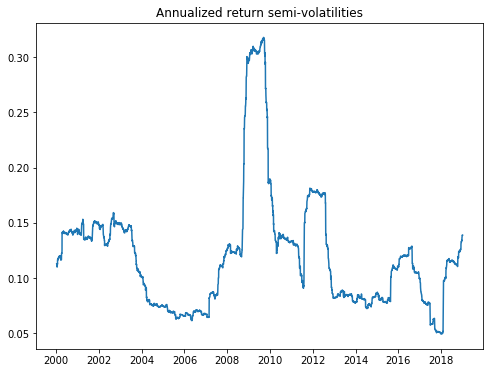

In [20]:
plt.figure(figsize = (8,6))
plt.plot(data1_spy['Date'], data1_spy['ann_return_semivol'])
plt.title("Annualized return semi-volatilities");

In [21]:
data1_spy_2018 = data1_spy[data1_spy['Date'].dt.year == 2018].iloc[:,0:3].reset_index(drop=True)
data1_spy_2018.head()

,Date,Price,return
0,2018-01-02,268.77,0.007157
1,2018-01-03,270.47,0.006325
2,2018-01-04,271.61,0.004215
3,2018-01-05,273.42,0.006664
4,2018-01-08,273.92,0.001829


In [22]:
len(data1_spy_2018[data1_spy_2018['return'] < -0.02])/len(data1_spy_2018)

0.055776892430278883

In [23]:
Var = data1_spy_2018['return'].quantile(0.05)
Var

-0.02144958473986508

In [25]:
Cvar = data1_spy_2018[data1_spy_2018['return'] < Var]['return'].mean()
Cvar

-0.02786116034896852

#### Drawdowns

In [34]:
data1_spy['portval_vec'] = (1+data1_spy['return']).cumprod()
data1_spy['drawdown'] = data1_spy['portval_vec'] - data1_spy['portval_vec'].cummax()

In [49]:
MDD = data1_spy['drawdown'].min()   
MDD

-0.7105125628140673

In [55]:
date = data1_spy[data1_spy['drawdown'] == MDD].Date
date

2550   2009-03-09
Name: Date, dtype: datetime64[ns]

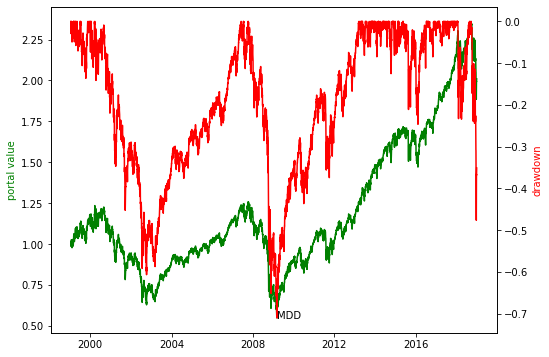

In [57]:
fig, ax1 = plt.subplots(figsize = (8,6))
ax2 = ax1.twinx()
ax1.plot(data1_spy['Date'], data1_spy['portval_vec'],'g-')
ax1.set_ylabel('portal value', color = 'g')
ax2.plot(data1_spy['Date'], data1_spy['drawdown'], 'r-')
ax2.set_ylabel('drawdown', color = 'r')
ax2.annotate('MDD', xy=(date, MDD));

### Problem 3

### 1.

In [61]:
data2 = pd.read_excel("HW1_Due20200927.xlsx", sheet_name = "DataSource_CAPMAssetClasses", header = 1)
data2.head()

,Period Ending,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
0,1999-01-31,1.164369,0.71,1.35,-1.57,5.87,0.80,4.50,-2.27,-0.30,-1.507453,0.440000,-2.685540
1,1999-02-28,-0.698657,-1.75,-0.68,-3.51,-4.57,-1.41,-9.15,-6.83,-2.38,0.963531,-4.600000,-1.644916
2,1999-03-31,-0.014495,0.55,1.16,0.19,5.27,2.07,3.56,-0.82,4.17,13.214558,16.879999,-0.545957
3,1999-04-30,0.661948,0.32,1.83,-0.15,0.13,9.34,8.83,9.13,4.05,12.370000,4.130000,9.669238
4,1999-05-31,0.688692,-0.88,-0.92,-2.02,-3.07,-1.10,0.16,3.07,-5.15,-0.580000,-5.460000,2.119436


In [62]:
data2 = data2.set_index('Period Ending')
sigma = data2.cov()*12

In [110]:
expret = []
for i in data2.columns:
    expret.append(stats.gmean(1+0.01*data2[i])**12*100-100)
dict_expret ={k:v for k,v in zip(data2.columns,expret)}

In [111]:
dict_expret

{'Bloomberg Barclays - U.S. TIPS Index': 5.204746074877576,
 'Bloomberg Barclays - U.S. Aggregate Index': 4.549060800291912,
 'BofA Merrill Lynch - U.S. High Yield Index': 6.301819821880386,
 'FTSE - Non U.S. Govt Bond Index ($)': 3.4046473974352836,
 'Russell - 1000 Growth Index': 5.054798898756175,
 'Russell - 1000 Value Index': 6.1542827146389385,
 'Russell - 2000 Growth Index': 6.1399491914584985,
 'Russell - 2000 Value Index': 8.227702012485906,
 'MSCI - EAFE Index ($Net)': 3.5211300300243664,
 'MSCI - Emerging Markets Index ($ Net)': 8.517774129308137,
 'S&P - GSCI Total Index': 0.5697543252556159,
 'MSCI - U.S. REIT Index': 9.651476941933026}

In [91]:
e = np.ones(len(data2.columns)).transpose()
sigma_inv = np.linalg.inv(sigma)
w_minv = np.dot(sigma_inv,e)/np.dot(np.dot(e.transpose(),sigma_inv),e)
w_msr = np.dot(sigma_inv,expret)/np.dot(np.dot(e.transpose(),sigma_inv),expret)
[w_minv,w_msr]

[array([-0.26479199,  1.20175145,  0.04951453, -0.04803426,  0.03107269,
         0.07572186, -0.00318499,  0.03723636, -0.03350547, -0.02416522,
         0.03334852, -0.05496348]),
 array([-0.18281607,  1.1266578 ,  0.08328334, -0.06954315,  0.06533554,
         0.04304435, -0.05857769,  0.12382533, -0.13657334,  0.04459294,
         0.01142395, -0.05065302])]

In [82]:
from scipy import optimize

In [98]:
def minvar(w,sigma):
    return np.dot(np.dot(w,sigma),w.transpose())
target_minv = w_minv.dot(expret)
target_msr = w_msr.dot(expret)
constraint = optimize.LinearConstraint([e.transpose(),expret], lb=[1,0], ub=[1,target_minv])

In [99]:
res = optimize.minimize(
    minvar, x0=[0.5 for i in range(len(data2.columns))], args=(sigma,), constraints=constraint, bounds=[(0, 1) for i in range(len(data2.columns))],
)

In [100]:
res

     fun: 11.417659781419372
     jac: array([30.8512789 , 20.43517995, 22.39850378, 33.4520247 , 15.33239067,
       13.07483912, 14.86196697, 13.58619034, 30.82944167, 41.47568309,
       60.68033242, 40.2532804 ])
 message: 'Optimization terminated successfully.'
    nfev: 126
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([8.86524020e-13, 9.17311745e-01, 0.00000000e+00, 6.72648326e-12,
       1.67954176e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.56176004e-03, 3.88372076e-12, 6.03310770e-02, 3.36311905e-12])

In [128]:
w_minv_new = res.x
w_minv_new

array([8.86524020e-13, 9.17311745e-01, 0.00000000e+00, 6.72648326e-12,
       1.67954176e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.56176004e-03, 3.88372076e-12, 6.03310770e-02, 3.36311905e-12])

#### minimum variance portfolio

In [112]:
{k:v for k,v in zip(data2.columns,res.x)}

{'Bloomberg Barclays - U.S. TIPS Index': 8.865240197022431e-13,
 'Bloomberg Barclays - U.S. Aggregate Index': 0.9173117453277859,
 'BofA Merrill Lynch - U.S. High Yield Index': 0.0,
 'FTSE - Non U.S. Govt Bond Index ($)': 6.7264832570234675e-12,
 'Russell - 1000 Growth Index': 0.016795417606293876,
 'Russell - 1000 Value Index': 0.0,
 'Russell - 2000 Growth Index': 0.0,
 'Russell - 2000 Value Index': 0.0,
 'MSCI - EAFE Index ($Net)': 0.00556176003925995,
 'MSCI - Emerging Markets Index ($ Net)': 3.8837207602331826e-12,
 'S&P - GSCI Total Index': 0.060331077025786065,
 'MSCI - U.S. REIT Index': 3.363119045514954e-12}

### 2

In [116]:
def maxsharpe(w,expret,sigma):
    return -w.dot(expret)/(w.dot(sigma).dot(w.transpose()))
constraint2 = optimize.LinearConstraint(e.transpose(), lb=1, ub=1)
res2 = optimize.minimize(
    maxsharpe, x0=[1 for i in range(len(data2.columns))], args=(expret,sigma,), constraints=constraint2, bounds=[(0, 1) for i in range(len(data2.columns))],
)

In [117]:
res2

     fun: -0.4515685007654214
     jac: array([0.72095275, 0.45175139, 0.45183031, 0.98840909, 0.44742654,
       0.44898604, 0.47436273, 0.44998819, 1.05383268, 0.92228372,
       0.44912842, 1.56396586])
 message: 'Optimization terminated successfully.'
    nfev: 188
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.00000000e+00, 9.20116352e-01, 8.69852556e-03, 0.00000000e+00,
       1.08745326e-02, 3.10353732e-02, 1.79530839e-15, 2.72412929e-02,
       0.00000000e+00, 0.00000000e+00, 2.03392421e-03, 0.00000000e+00])

In [125]:
w_msr_new = res2.x

#### maximum sharpe ratio portfolio

In [119]:
{k:v for k,v in zip(data2.columns,res2.x)}

{'Bloomberg Barclays - U.S. TIPS Index': 0.0,
 'Bloomberg Barclays - U.S. Aggregate Index': 0.9201163515438098,
 'BofA Merrill Lynch - U.S. High Yield Index': 0.008698525561086362,
 'FTSE - Non U.S. Govt Bond Index ($)': 0.0,
 'Russell - 1000 Growth Index': 0.010874532583113829,
 'Russell - 1000 Value Index': 0.031035373241328986,
 'Russell - 2000 Growth Index': 1.7953083929629315e-15,
 'Russell - 2000 Value Index': 0.027241292862725322,
 'MSCI - EAFE Index ($Net)': 0.0,
 'MSCI - Emerging Markets Index ($ Net)': 0.0,
 'S&P - GSCI Total Index': 0.0020339242080750575,
 'MSCI - U.S. REIT Index': 0.0}

In [121]:
def maxret(w,expret):
    return -w.dot(expret)
res3 = optimize.minimize(
    maxret, x0=[1 for i in range(len(data2.columns))], args=(expret,), constraints=constraint2, bounds=[(0, 1) for i in range(len(data2.columns))],
)

In [122]:
res3

     fun: -9.651476941933502
     jac: array([-5.20474601, -4.54906082, -6.3018198 , -3.40464735, -5.05479884,
       -6.15428269, -6.1399492 , -8.22770202, -3.52112997, -8.51777411,
       -0.56975424, -9.65147698])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 6.43929354e-15, 0.00000000e+00,
       0.00000000e+00, 6.77236045e-15, 3.99680289e-15, 2.19824159e-14,
       0.00000000e+00, 2.19824159e-14, 0.00000000e+00, 1.00000000e+00])

In [126]:
w_mr_new =res3.x

#### maximum return portfolio

In [124]:
{k:v for k,v in zip(data2.columns,res3.x)}

{'Bloomberg Barclays - U.S. TIPS Index': 0.0,
 'Bloomberg Barclays - U.S. Aggregate Index': 0.0,
 'BofA Merrill Lynch - U.S. High Yield Index': 6.439293542825908e-15,
 'FTSE - Non U.S. Govt Bond Index ($)': 0.0,
 'Russell - 1000 Growth Index': 0.0,
 'Russell - 1000 Value Index': 6.772360450213455e-15,
 'Russell - 2000 Growth Index': 3.9968028886505635e-15,
 'Russell - 2000 Value Index': 2.19824158875781e-14,
 'MSCI - EAFE Index ($Net)': 0.0,
 'MSCI - Emerging Markets Index ($ Net)': 2.19824158875781e-14,
 'S&P - GSCI Total Index': 0.0,
 'MSCI - U.S. REIT Index': 1.0}

### 3.

In [167]:
def old_wt(c):
    return (1-c)*w_minv+c*w_msr
def old_ret(c):
    return old_wt(c).dot(expret)
def old_risk(c):
    return np.sqrt(old_wt(c).transpose().dot(sigma).dot(old_wt(c)))
def new_wt(c):
    return (1-c)*w_minv_new+c*w_msr_new
def new_ret(c):
    return new_wt(c).dot(expret)
def new_risk(c):
    return np.sqrt(new_wt(c).transpose().dot(sigma).dot(new_wt(c)))

In [175]:
old_risk_list,old_ret_list,new_risk_list,new_ret_list = [],[],[],[]
for i in range(10):
    old_risk_list.append(old_risk(i))
    old_ret_list.append(old_ret(i))
    new_risk_list.append(new_risk(i))
    new_ret_list.append(new_ret(i))

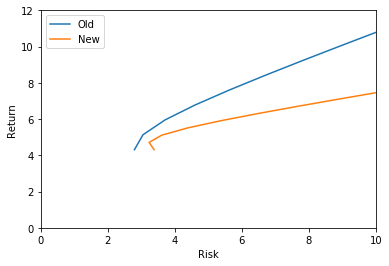

In [178]:
plt.plot(old_risk_list,old_ret_list, label = 'Old')
plt.plot(new_risk_list,new_ret_list,label = 'New')
plt.xlabel('Risk')
plt.xlim(0,10)
plt.ylabel('Return')
plt.ylim(0,12)
plt.legend();